###The Bullard plot method is used for calculating the specific heat flow in an area based on temperature data and the concept of thermal resistance.
### Thermal resistance  is the integrated reciprocal of thermal conductivities over a depth range z, i.e. how effectively a layered sequence of rocks retards the flow of heat. 

### Assume we have a borehole with a depth of 2.2 km. It penetrates multiple layers. The average surface temperature is 11 °C. At each layer boundary, temperatures were measured, as well as at the maximum depth of the borehole. So in total, we have 4 temperature measurements: * 22 °C @ 1 km depth * 30 °C @ 1.4 km depth * 41 °C @ 2 km depth * 47 °C @ 2.2 km depth
### In the following, we will calculate the cumulative thermal resistances and create a Bullard Plot.


In [4]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# set up arrays
z = np.array([1000, 400, 600, 200])
tc = np.array([3.2, 2.3, 1.6, 4.2]) #the time between end of drilling and end of mud circulation and  the time between end of mud circulation and measurement.

T = np.array([10, 22, 30, 46, 49]) # here we also include the surface temperature


# cumulative thermal resistances
# We write out the resistances here manually to be better understandable, you could also do that in a loop!
r0 = 0                 # thermal resistance at the surface
r1 = z[0]/tc[0]
r2 = r1 + (z[1]/tc[1])
r3 = r2 + (z[2]/tc[2])
r4 = r3 + (z[3]/tc[3])

R = np.array([r0, r1, r2, r3, r4])

In [6]:
# get the linear regression using polyfit
m, b = np.polyfit(R,T,1)
# set up resistance vector 
R_reg = np.linspace(0,1200,1200)
# calculating temperature of resistance vector
T_reg = m * R_reg + b

print("The specific heat flow is about {} W/m²".format(round(m,4)))

The specific heat flow is about 0.0429 W/m²


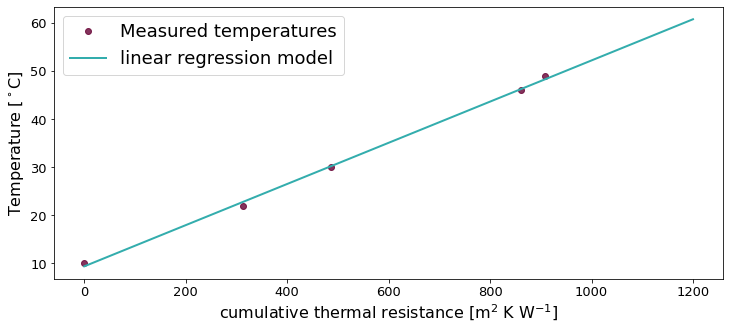

In [7]:
# plot the results
fig = plt.figure(figsize=(12,5))
dots, = plt.plot(R,T,'o', color='#660033', alpha=0.8)
line, = plt.plot(R_reg,T_reg, '-', linewidth=2, color='#33ADAD')
plt.xlabel('cumulative thermal resistance [m$^2$ K W$^{-1}$]', fontsize=16)
plt.ylabel('Temperature [$^\circ$C]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend([dots,line], ["Measured temperatures", "linear regression model"], loc=2, fontsize=18)